In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('./data/cable-complaints.csv')

In [3]:
df.head()

,Date of Complaint,Date of Closure,Street,City,State,ZIP,Cable Provider,Billing,Service,Internet,...,Reception,Construction,Marketing,Installation,Cable Service Availability,Cable Line Related,Telephone Service,Other,Type,Location
0,1/1/1998,1/5/1998,null Avenue,Gaithersburg,MD,20878.0,Comcast,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Complaint,"null Avenue\nGaithersburg, MD 20878"
1,1/3/1998,12/31/2000,SAFFRON LANE,SILVER SPRING,MD,20901.0,Cable/TV Montgomery,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complaint,"SAFFRON LANE\nSILVER SPRING, MD 20901"
2,1/3/1998,12/31/2000,DRURY RD,SILVER SPRING,MD,20906.0,Comcast,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Complaint,"DRURY RD\nSILVER SPRING, MD 20906"
3,1/6/1998,12/31/2000,"WOODMONT AVE., #401",BETHESDA,MD,20814.0,Cable/TV Montgomery,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complaint,"WOODMONT AVE., #401\nBETHESDA, MD 20814"
4,1/6/1998,12/31/2000,"EAST WEST HWY, #616",SILVER SPRING,MD,20910.0,Cable/TV Montgomery,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complaint,"EAST WEST HWY, #616\nSILVER SPRING, MD 20910"


### Preprocessing steps
1. Check correct data types.
2. Examine unique values in different columns.
3. Decide what to do with missing values:
    - Drop them.
    - Fill the missing values ==> Data imputation.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23969 entries, 0 to 23968
Data columns (total 21 columns):
Date of Complaint             23969 non-null object
Date of Closure               23959 non-null object
Street                        23759 non-null object
City                          23738 non-null object
State                         23960 non-null object
ZIP                           23529 non-null float64
Cable Provider                23968 non-null object
Billing                       9062 non-null float64
Service                       6124 non-null float64
Internet                      4423 non-null float64
Telephone Answering Time      2267 non-null float64
Reception                     5703 non-null float64
Construction                  1359 non-null float64
Marketing                     1172 non-null float64
Installation                  1201 non-null float64
Cable Service Availability    254 non-null float64
Cable Line Related            2341 non-null float64
Telepho

In [5]:
df['Cable Provider'].unique()

array(['Comcast', 'Cable/TV Montgomery', 'Cable TV Mo /Comcast',
       'Starpower', 'Star Power', 'Starpower/RCN', 'RCN', 'Verizon',
       'Crown Castle', 'Inquiry', 'ICBN', 'Service Request', nan],
      dtype=object)

In [6]:
df['City'].unique();

### Use `apply` with functions / inline (anonymous) functions

**Example:** Get all the city names in lowercase.

In [7]:
df['City Clean'] = df['City'].fillna('Unknown') #First, get rid of NA

In [8]:
df['City Clean'].head(2)

0     Gaithersburg
1    SILVER SPRING
Name: City Clean, dtype: object

In [9]:
'WieN'.lower().capitalize()

'Wien'

In [10]:
df['City Clean'] = df['City Clean'].apply(lambda txt: txt.lower().capitalize())

### Cleaning date columns

In [11]:
from datetime import datetime

In [12]:
df['Date of Closure'].head(1)

0    1/5/1998
Name: Date of Closure, dtype: object

In [13]:
datetime.strptime('1/5/1998', '%m/%d/%Y') # Parses into year, month, day

datetime.datetime(1998, 1, 5, 0, 0)

In [14]:
def date_cleaner(date):
    dt = datetime.strptime(date, '%m/%d/%Y')
    return dt

In [15]:
def date_cleaner_v2(date):
    dt = datetime.strptime(date, '%m/%d/%Y : %H:%M:%S')
    return dt

In [16]:
date_cleaner_v2('1/5/1998 : 15:20:04')

datetime.datetime(1998, 1, 5, 15, 20, 4)

In [17]:
df['Date of Complaint Clean'] = df['Date of Complaint'].apply(date_cleaner)

In [18]:
df['Date of Complaint Clean'].head()

0   1998-01-01
1   1998-01-03
2   1998-01-03
3   1998-01-06
4   1998-01-06
Name: Date of Complaint Clean, dtype: datetime64[ns]

**Problem:** Some complaints are still open, so we need to account for that.

In [19]:
pd.isna('I am not NaN')

False

In [37]:
def date_cleaner_closure(date):
    if str(date).split('/')[-1] == '9999':
        date = datetime.now().strftime('%m/%d/%Y') 
    if pd.isna(date) | pd.isnull(date):
        #date = '9/23/2019' # hard-coded date
        date = datetime.now().strftime('%m/%d/%Y') # This returns correct date & format
    dt = datetime.strptime(date, '%m/%d/%Y')
    return pd.to_datetime(dt) # force to get rid of 00:00:00

In [40]:
df['Date of Closure'].head(1)

0    1/5/1998
Name: Date of Closure, dtype: object

In [38]:
df['Date of Closure Clean'] = df['Date of Closure'].apply(date_cleaner_closure)

In [31]:
df['Date of Closure Clean v2'] = pd.to_datetime(df['Date of Closure Clean'])

In [33]:
df['Time to Completion'] = df['Date of Closure Clean v2']-df['Date of Complaint Clean']

In [34]:
df['Time to Completion (days)'] = df['Time to Completion'].apply(lambda dt: dt.days)

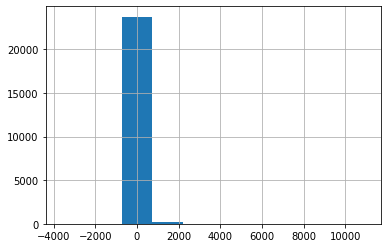

In [36]:
df['Time to Completion (days)'].hist()

In [46]:
df.drop(columns='Date of Closure Clean v2', inplace=True)

In [47]:
df.columns

Index(['Date of Complaint', 'Date of Closure', 'Street', 'City', 'State',
       'ZIP', 'Cable Provider', 'Billing', 'Service', 'Internet',
       'Telephone Answering Time', 'Reception', 'Construction', 'Marketing',
       'Installation', 'Cable Service Availability', 'Cable Line Related',
       'Telephone Service', 'Other', 'Type', 'Location', 'City Clean',
       'Date of Complaint Clean', 'Date of Closure Clean',
       'Time to Completion', 'Time to Completion (days)'],
      dtype='object')

In [48]:
df.head()

,Date of Complaint,Date of Closure,Street,City,State,ZIP,Cable Provider,Billing,Service,Internet,...,Cable Line Related,Telephone Service,Other,Type,Location,City Clean,Date of Complaint Clean,Date of Closure Clean,Time to Completion,Time to Completion (days)
0,1/1/1998,1/5/1998,null Avenue,Gaithersburg,MD,20878.0,Comcast,NaN,NaN,NaN,...,NaN,NaN,NaN,Complaint,"null Avenue\nGaithersburg, MD 20878",Gaithersburg,1998-01-01,1998-01-05,4 days,4
1,1/3/1998,12/31/2000,SAFFRON LANE,SILVER SPRING,MD,20901.0,Cable/TV Montgomery,1.0,NaN,NaN,...,NaN,NaN,NaN,Complaint,"SAFFRON LANE\nSILVER SPRING, MD 20901",Silver spring,1998-01-03,2000-12-31,1093 days,1093
2,1/3/1998,12/31/2000,DRURY RD,SILVER SPRING,MD,20906.0,Comcast,NaN,NaN,NaN,...,NaN,NaN,NaN,Complaint,"DRURY RD\nSILVER SPRING, MD 20906",Silver spring,1998-01-03,2000-12-31,1093 days,1093
3,1/6/1998,12/31/2000,"WOODMONT AVE., #401",BETHESDA,MD,20814.0,Cable/TV Montgomery,NaN,NaN,NaN,...,NaN,NaN,NaN,Complaint,"WOODMONT AVE., #401\nBETHESDA, MD 20814",Bethesda,1998-01-06,2000-12-31,1090 days,1090
4,1/6/1998,12/31/2000,"EAST WEST HWY, #616",SILVER SPRING,MD,20910.0,Cable/TV Montgomery,1.0,1.0,NaN,...,NaN,NaN,NaN,Complaint,"EAST WEST HWY, #616\nSILVER SPRING, MD 20910",Silver spring,1998-01-06,2000-12-31,1090 days,1090


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23969 entries, 0 to 23968
Data columns (total 26 columns):
Date of Complaint             23969 non-null object
Date of Closure               23959 non-null object
Street                        23759 non-null object
City                          23738 non-null object
State                         23960 non-null object
ZIP                           23529 non-null float64
Cable Provider                23968 non-null object
Billing                       9062 non-null float64
Service                       6124 non-null float64
Internet                      4423 non-null float64
Telephone Answering Time      2267 non-null float64
Reception                     5703 non-null float64
Construction                  1359 non-null float64
Marketing                     1172 non-null float64
Installation                  1201 non-null float64
Cable Service Availability    254 non-null float64
Cable Line Related            2341 non-null float64
Telepho

In [53]:
df['Telephone Answering Time'].fillna(0, inplace=True)

In [54]:
df['Telephone Answering Time'].unique()

array([0., 1.])